# Least-Squares Problem Project
## Fish market


# 1 ลักษณะของกลุ่มข้อมูล ( Data Description )

หัวข้อของกลุ่มหรือ Data set ที่ทางกลุ่มนำมาศึกษาคือเรื่อง Fish Market โดยกลุ่มข้อมูลที่เลือกนำมาศึกษาเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับลักษณะต่าง ๆ ของปลา
    โดย Data set ที่เลือกมา มีลักษณะดังนี้
        - Data set characteristic : Multivariate
        - Attribute characteristic : Real
        - ไม่มี missing values
        - จำนวน Instance: 159
        - จำนวน Attribute: 7 ดังนี้
            1. Species (Species name of fish)
            2. Weight (Weight of fish in gram)
            3. Length1 (Vertical length in cm)
            4. Length2 (Diagonal length in cm)
            5. Length3 (Cross length in cm)
            6. Height (Height in cm)
            7. Width (Diagonal width in cm)
          
กลุ่มของพวกเราได้นำตัวแปร 4 ตัวมาใช้ในการคาดการณ์น้ำหนักของปลา ดังนี้
            1. Species (Species name of fish)
            2. Weight (Weight of fish in gram)
            3. Height (Height in cm)
            4. Width (Diagonal width in cm)
          
          
          

## 2 Experiment
โดยจะเริ่มจากการ import module ที่จำเป็นต้องใช้ในการวิเคราะห์และทำนายข้อมูลตามโค้ดด้านล่าง ดังต่อไปนี้
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from matplotlib.pyplot import plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 ขั้นตอนแรกจะเป็นการ import data ไว้ในตัวแปร df เพื่อแสดงผลข้อมูลว่าเป็นประเภทใดบ้าง และนำไปใช้วิเคราะห์ข้อมูลต่อไป 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/costalferz/DSI205/main/Fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


ขั้นตอนนี้จะเป็นการตรวจสอบข้อมูลว่ามีค่า null หรือไม่

In [4]:
df.dropna()
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


ในขั้นต่อไปจะเป็นการตรวจสอบข้อมูลว่ามีค่า Weight น้อยกว่าหรือเท่ากับ 0 เพื่อนำข้อมูลนั้นออก แล้วเก็บข้อมูลไว้ในตัวแปร df1

In [6]:
df[df.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


หาค่า Correlation เพื่อดูความสัมพันธ์ของข้อมูลว่ามีความสัมพันธ์กันแบบใด ในรูปแบบของแผนภูมิและตารางแสดงผล

<AxesSubplot:>

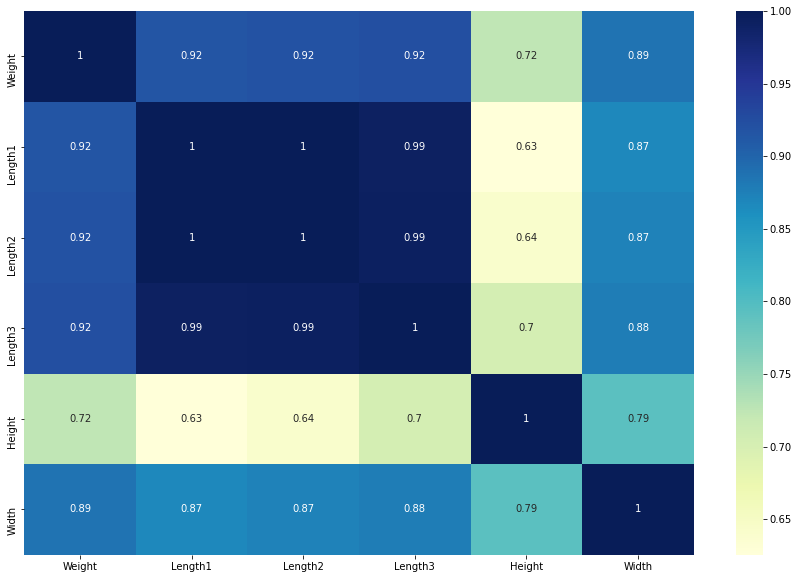

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [9]:
df1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


กราฟแสดงแนวโน้มของข้อมูลในแต่ละตัวแปร

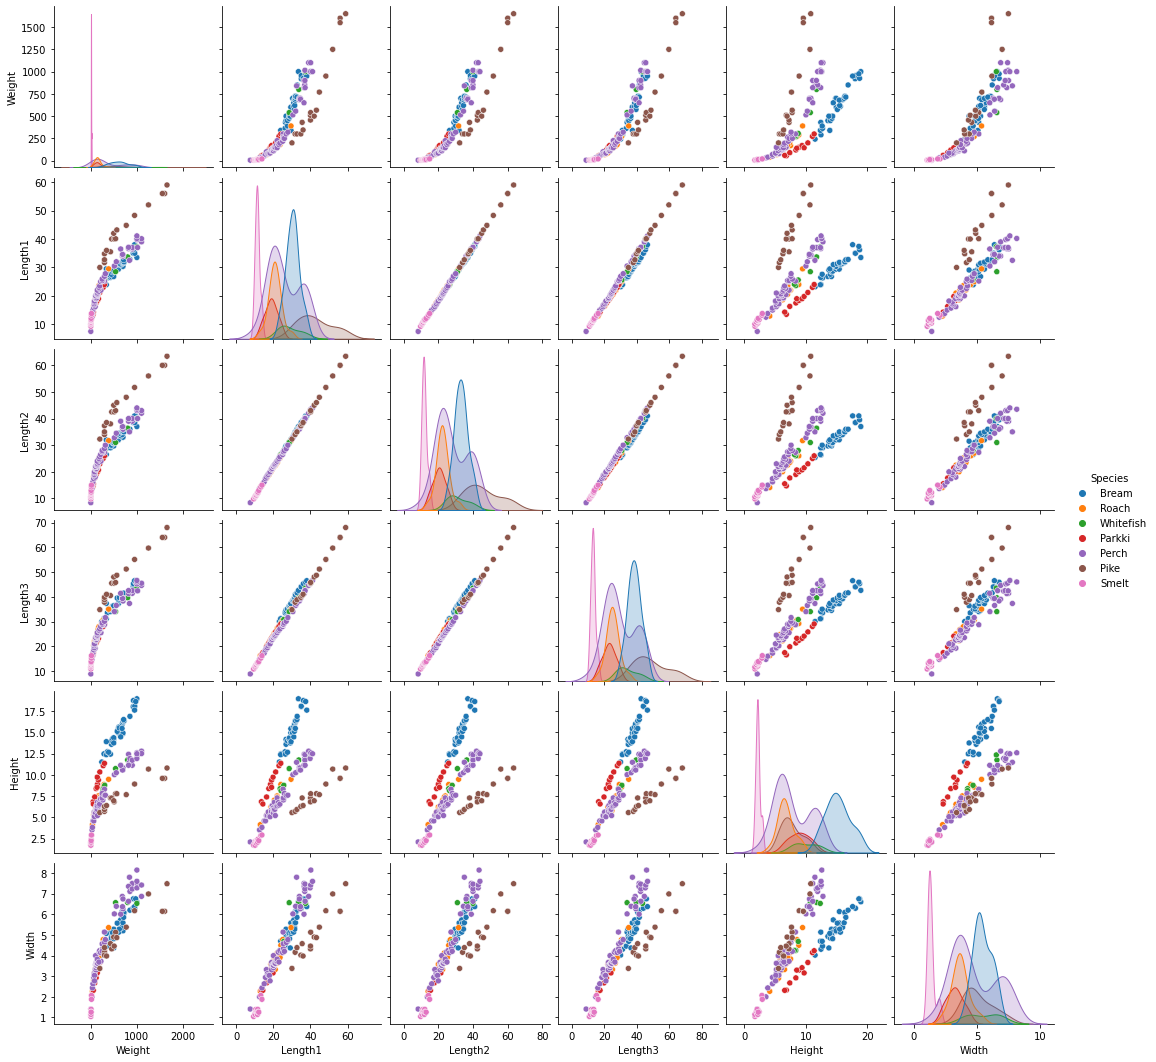

In [10]:
sns.pairplot(df1, kind='scatter', hue='Species');

จากแผนภูมิข้างต้น ทำให้เรารู้ว่า Length1, Length2, Length3 มีความสัมพันธ์กันมากเกินไป ทำให้ผลลัพธ์ที่ได้มีค่าที่ดีเกินจริง ดังนั้น เราจึงนำทั้ง 3 ตัวแปรนี้ออกแล้วเก็บข้อมูลทั้งหมดไว้ในตัวแปร df2

In [11]:
df2=df1.drop(['Length1', 'Length2', 'Length3'],axis=1)
df2.shape

(158, 4)

แสดงข้อมูลใน df2 

In [12]:
df2

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690
156,Smelt,12.2,2.2770,1.2558
157,Smelt,19.7,2.8728,2.0672


ต่อไปจะเป็นการประยุกต์ใช้สถิติในการหา outlier ของข้อมูล

In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,158.0,400.847468,357.697796,5.9000,121.25000,281.50000,650.00000,1650.000
Height,158.0,8.986790,4.295191,1.7284,5.94060,7.78900,12.37185,18.957
Width,158.0,4.424232,1.689010,1.0476,3.39865,4.27705,5.58675,8.142


Text(0.5, 1.0, 'Outlier Detection based on Weight')

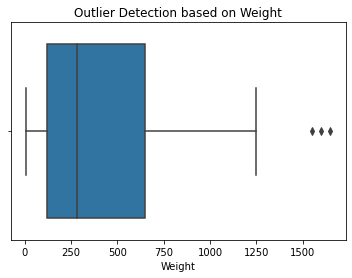

In [14]:
sns.boxplot(x=df2['Weight']);
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Outlier Detection based on Weight')

In [15]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

In [16]:
outlier_detection(df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier Detection based on Height')

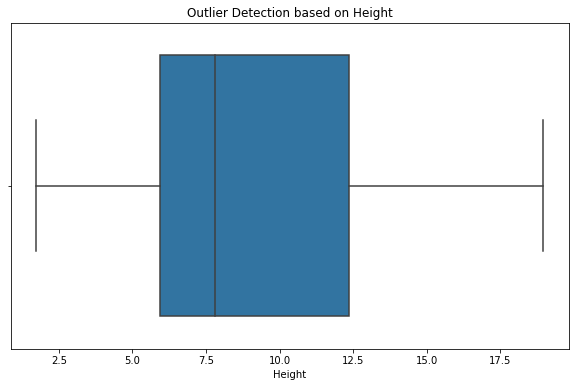

In [17]:
sns.boxplot(x =df2['Height'])
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

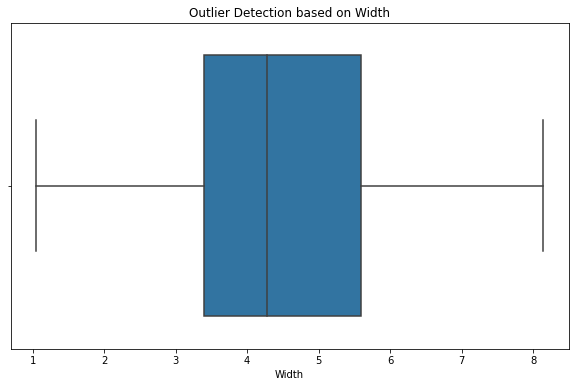

In [18]:
sns.boxplot(x = df2['Width'])
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Outlier Detection based on Width')

นำ outlier ออกจากข้อมูลแล้วเก็บข้อมูลทั้งหมดไว้ในตัวแปร df3

In [19]:
df3 = df2.drop([142,143,144])
df3.shape

(155, 4)

In [20]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


In [21]:
sp = df3['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Smelt,Pike,Parkki,Whitefish
Species,56,35,19,14,14,11,6


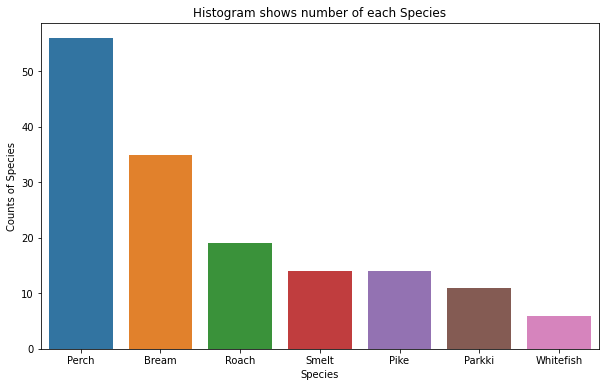

In [22]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.title('Histogram shows number of each Species')
plt.show()

ขั้นตอนนี้จะเป็นการแปลงข้อมูล เนื่องจาก Species เป็นข้อมูลเชิงคุณภาพจึงทำการแปลงเป็นข้อมูลเชิงปริมาณ เพื่อนำมาใช้ในการสุ่มข้อมูล

In [23]:
df3.loc[df3["Species"] == "Perch",["Species"]] = 0
df3.loc[df3["Species"] == "Bream",["Species"]] = 1
df3.loc[df3["Species"] == "Roach",["Species"]] = 2
df3.loc[df3["Species"] == "Pike",["Species"]] = 3
df3.loc[df3["Species"] == "Smelt",["Species"]] = 4
df3.loc[df3["Species"] == "Parkki",["Species"]] = 5
df3.loc[df3["Species"] == "Whitefish",["Species"]] = 6
df3

,Species,Weight,Height,Width
0,1,242.0,11.5200,4.0200
1,1,290.0,12.4800,4.3056
2,1,340.0,12.3778,4.6961
3,1,363.0,12.7300,4.4555
4,1,430.0,12.4440,5.1340
...,...,...,...,...
154,4,12.2,2.0904,1.3936
155,4,13.4,2.4300,1.2690
156,4,12.2,2.2770,1.2558
157,4,19.7,2.8728,2.0672


กำหนดให้ Species, Height และ Width เป็นตัวแปรต้นและให้ Weight เป็นตัวแปรตาม

In [24]:
X = df3.iloc[:,[0,2,3,]]
X.head()

,Species,Height,Width
0,1,11.5200,4.0200
1,1,12.4800,4.3056
2,1,12.3778,4.6961
3,1,12.7300,4.4555
4,1,12.4440,5.1340


In [25]:
y = df3['Weight']
y.head(5)

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

แบ่งข้อมูลออกเป็น 2 ส่วน จากข้อมูลที่มี 100% ซึ่งแบ่งออกเป็นชุดข้อมูล training set 80% และชุดข้อมูล test set 20%

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (124, 3)
X_test dimension=  (31, 3)
y_train dimension=  (124,)
y_test dimension=  (31,)


สร้างแบบจำลองข้อมูลขึ้นมาโดยใช้ Linear Regression และนำข้อมูลมาใช้กับโมเดลโดย fit ข้อมูลกับ X_train และ y_train

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

สร้างสมการเส้นตรงโดยใช้ค่า intercept และ coefficients และแสดงค่า score เพื่อทดสอบความแม่นยำของโมเดล

In [28]:
print('coef= ', model.coef_) 
print('intercept= ', model.intercept_)
print('score= ', model.score(X,y))

coef=  [ 17.85548916   9.36086721 160.53302864]
intercept=  -446.13761881905
score=  0.8734971335016868


สมการแสดงความสัมพันธ์ระหว่างตัวแปร X และ y โดยใช้ Least-Squares line $y = {\beta}_{0} + {\beta}_{1}X $ เพื่อหาเส้นตรงที่มีค่า residuals ต่ำสุด

In [29]:
print('y = ' + str('%.2f' % model.intercept_) + ' + ' + str('%.2f' % model.coef_[0]) + 'X1 ' + ' + '
   + str('%.2f' % model.coef_[1]) + 'X2 ' + ' + ' + str('%.2f' % model.coef_[2]) + 'X3 ')

y = -446.14 + 17.86X1  + 9.36X2  + 160.53X3 


เปรียบเทียบน้ำหนักจริงกับน้ำหนักที่ทำนายได้ ซึ่งสามารถใช้ตารางและกราฟอธิบายได้ ดังนี้

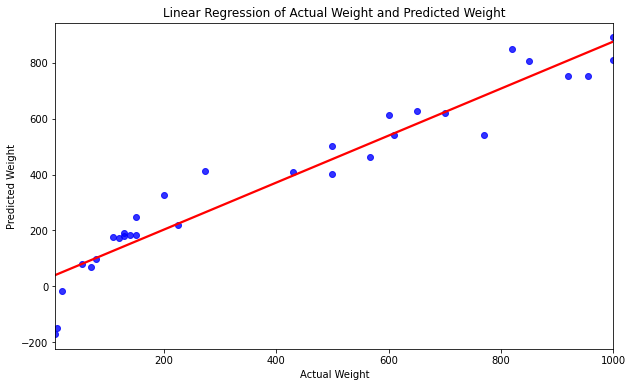

y = -446.14 + 17.86X1  + 9.36X2  + 160.53X3 


In [30]:
plt.figure()
sns.regplot( y_test , model.predict(X_test) , ci=None ,line_kws={"color":"red"},scatter_kws={"color":"blue"})
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Weight and Predicted Weight',)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()
print('y = ' + str('%.2f' % model.intercept_) + ' + ' + str('%.2f' % model.coef_[0]) + 'X1 ' + ' + '
   + str('%.2f' % model.coef_[1]) + 'X2 ' + ' + ' + str('%.2f' % model.coef_[2]) + 'X3 ')

In [31]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight'])
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.000000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,...,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.00000,120.000000,130.000000,1000.000000
Predicted Weight,177.844035,-170.037719,751.073609,809.171418,806.336336,80.718456,184.804829,-147.899336,-15.969886,328.114291,...,401.724184,501.038686,620.962131,412.181993,410.348976,219.795651,184.65936,172.536598,180.945881,890.145159


กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Height

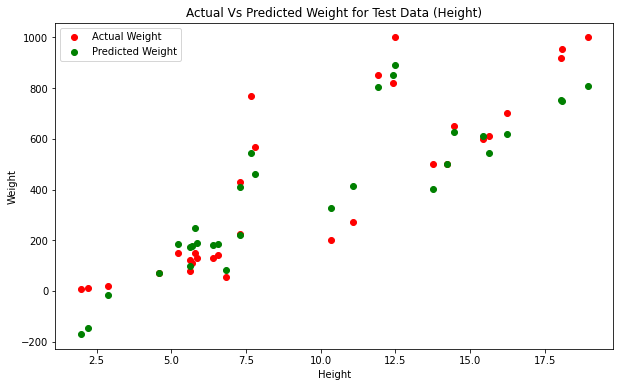

In [32]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Predicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Actual Vs Predicted Weight for Test Data (Height)')
plt.legend()
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Width

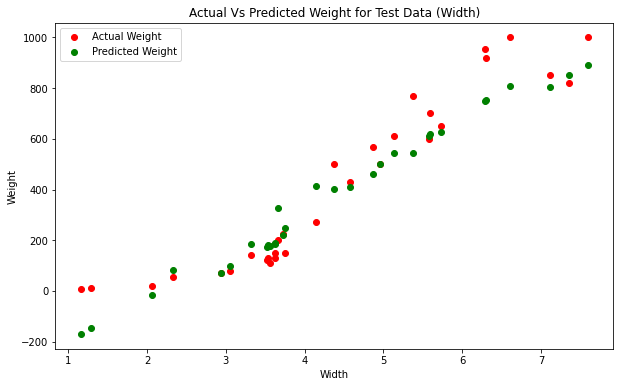

In [33]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Predicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Actual Vs Predicted Weight for Test Data (Width)')
plt.legend()
plt.show()

ทำการหาค่า R2, MAE, RMSE เพื่อตรวจสอบความคลาดเคลื่อนของโมเดล

In [34]:
y_pred = model.predict(X_test)
R2_lr = float(r2_score(y_pred, y_test)*100)
MAE_lr = float(mean_absolute_error(y_pred, y_test))
RMSE_lr = float(sqrt(mean_squared_error(y_pred, y_test)))
R2_lr = "{:.2f}".format(R2_lr)
MAE_lr = "{:.4f}".format(MAE_lr)
RMSE_lr = "{:.4f}".format(RMSE_lr)

print('R2 = ',R2_lr,'%')
print('MAE =',MAE_lr)
print('RMSE =',RMSE_lr)

R2 =  87.75 %
MAE = 79.7994
RMSE = 102.5202


# Random Forest Regression

import function ที่ต้องใช้งานเพิ่มเติม

In [35]:
from sklearn.ensemble import RandomForestRegressor 

แบ่งข้อมูลออกเป็น 2 ส่วน จากข้อมูลที่มี 100% ซึ่งแบ่งออกเป็นชุดข้อมูล training set 80% และชุดข้อมูล test set 20% โดยให้ X คือ Species, Height และ Width ตามลำดับ และ y คือ Weight

In [36]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(X, y, test_size =0.2, random_state = 42) 
print('X_train dimension= ', X_train2.shape)
print('X_test dimension= ', X_test2.shape)
print('y_train dimension= ', y_train2.shape)
print('y_test dimension= ', y_test2.shape)

X_train dimension=  (124, 3)
X_test dimension=  (31, 3)
y_train dimension=  (124,)
y_test dimension=  (31,)


สร้างโมเดลแบบ Random Forest Regression และนำข้อมูลมาใช้กับโมเดลโดย fit ข้อมูลกับ X_train2 และ y_train2 

In [37]:
reg_df3 = RandomForestRegressor(n_estimators=1000, n_jobs=-1,random_state=42)
reg_df3.fit(X_train2,y_train2)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Height

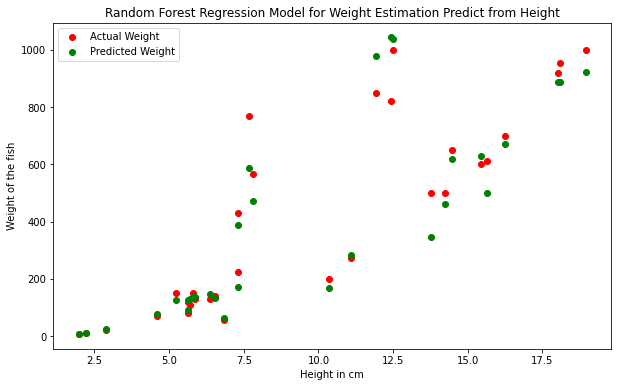

In [38]:
y_pred2 = reg_df3.predict(X_test2)
plt.scatter(X_test2['Height'], y_test2, color='red')
plt.scatter(X_test2['Height'], y_pred2, color='green')
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Random Forest Regression Model for Weight Estimation Predict from Height');
plt.legend(['Actual Weight','Predicted Weight'])
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Width

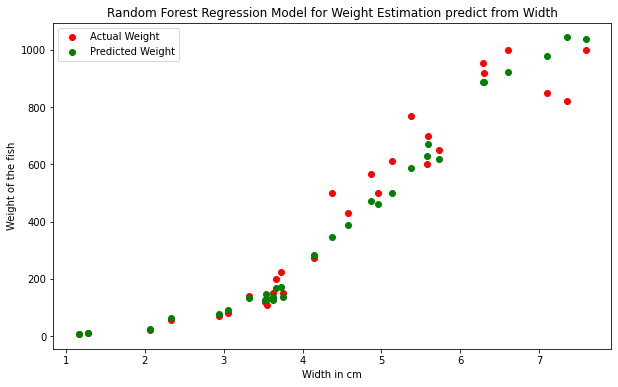

In [39]:
plt.scatter(X_test2['Width'], y_test2, color='red')
plt.scatter(X_test2['Width'], y_pred2, color='green')
plt.xlabel('Width in cm')
plt.rcParams["figure.figsize"] = (10,6) 
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regression Model for Weight Estimation predict from Width');
plt.legend(['Actual Weight','Predicted Weight'])
plt.show()

เปรียบเทียบน้ำหนักจริงกับน้ำหนักที่ทำนายได้ ซึ่งสามารถใช้ตารางและกราฟ scatter plot อธิบายได้ ดังนี้

In [49]:
y_pred2 = pd.DataFrame(y_pred2, columns=['Estimated RF Weight'])
y_test2 = pd.DataFrame(y_test2)
y_test2 = y_test2.reset_index(drop=True)
Table_RF = pd.concat([y_test2,y_pred2], axis=1)
Table_RF

,Actual Weight,Estimated RF Weight
0,110.0,NaN
1,7.5,NaN
2,955.0,NaN
3,1000.0,NaN
4,850.0,NaN
5,55.0,NaN
6,150.0,NaN
7,10.0,NaN
8,19.7,NaN
9,200.0,NaN


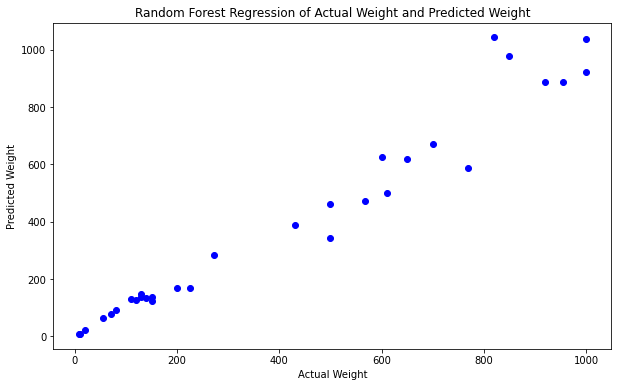

In [41]:
plt.figure()
plt.scatter( y_test2 , y_pred2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Random Forest Regression of Actual Weight and Predicted Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

ทำการหาค่า R2, MAE, RMSE เพื่อตรวจสอบความคลาดเคลื่อนของโมเดล

In [42]:
test_pred = reg_df3.predict(X_test2)
R2_rf = float(r2_score(y_test2 ,test_pred)*100)
MAE_rf = float(mean_absolute_error(y_test2 ,test_pred))
RMSE_rf = float(sqrt(mean_squared_error(y_test2, test_pred)))
R2_rf = "{:.2f}".format(R2_rf)
MAE_rf = "{:.4f}".format(MAE_rf)
RMSE_rf = "{:.4f}".format(RMSE_rf)
print('R2 = ',R2_rf,"%")
print('MAE =',MAE_rf)
print('RMSE =',RMSE_rf)

R2 =  95.13 %
MAE = 48.2846
RMSE = 73.7636


# 3 Result

## Linear Regression 

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้มีการแปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามไปด้วยเสมอ

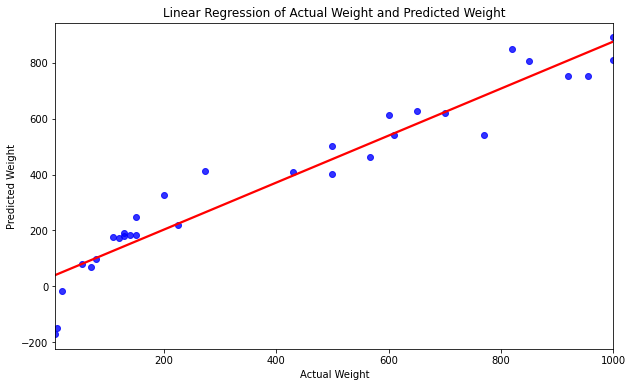

In [43]:
plt.figure()
sns.regplot( y_test , model.predict(X_test) , ci=None ,line_kws={"color":"red"},scatter_kws={"color":"blue"})
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Weight and Predicted Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

ค่าจากการตรวจสอบความคลาดเคลื่อนของโมเดล

In [44]:
print('R2 = ',R2_lr) 
print('MAE =',MAE_lr)
print('RMSE =',RMSE_lr)

R2 =  87.75
MAE = 79.7994
RMSE = 102.5202


## Random Forest Regression

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้มีการแปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามไปด้วยเสมอ

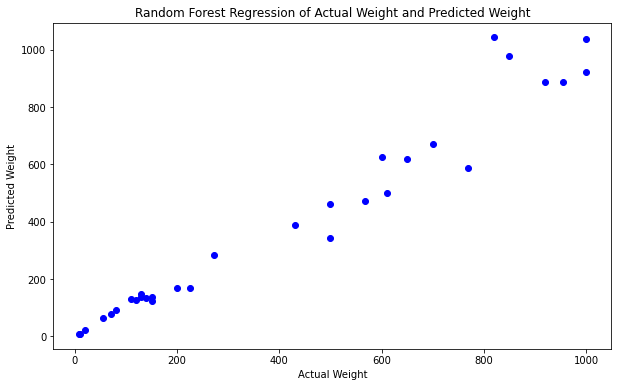

In [45]:
plt.figure()
plt.scatter( y_test2 , y_pred2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Random Forest Regression of Actual Weight and Predicted Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()


ค่าจากการตรวจสอบความคลาดเคลื่อนของโมเดล

In [46]:
print('R2 =',R2_rf,'%')
print('MAE =',MAE_rf)
print('RMSE =',RMSE_rf)

R2 = 95.13 %
MAE = 48.2846
RMSE = 73.7636


## Linear Regression VS Random  Forest Regression

ตารางแสดงค่าน้ำหนักของปลาระหว่าง Linear Regression และ Random Forest Regression โดยเทียบกับน้ำหนักจริง

In [47]:
pred_Lr = pd.DataFrame(predictedWeight)
pred_Rr = pd.DataFrame(y_pred2)
Weight = pd.DataFrame(y_test2)
pred_Lr.columns = ["Predict Linear Regression"]
pred_Rr.columns = ["Predict Random Forest"]
Weight.columns = ["Actual Weight"]
table5 = pd.concat([Weight,pred_Lr,pred_Rr], axis=1)
table5 = table5.sort_values(by=['Actual Weight'])
table5 = table5.reset_index(drop=True)
table5

,Actual Weight,Predict Linear Regression,Predict Random Forest
0,7.5,-170.037719,8.7619
1,10.0,-147.899336,10.1391
2,19.7,-15.969886,23.7119
3,55.0,80.718456,63.3934
4,70.0,69.017944,78.7910
5,80.0,96.276201,90.9500
6,110.0,177.844035,130.3920
7,120.0,172.536598,126.9670
8,130.0,190.451315,137.4370
9,130.0,180.945881,147.0000


# 4 Conclusion   


ตารางเปรียบทียบค่าความคลาดเคลื่อนของ Linear Regression และ Random Forest Regression

In [48]:
Table_compare = pd.DataFrame({'Linear Regression': [R2_lr, MAE_lr, RMSE_lr],
                   'Random Forest Regression': [R2_rf, MAE_rf, RMSE_rf],},
                  index=['R2', 'MAE', 'RMSE'])
Table_compare

,Linear Regression,Random Forest Regression
R2,87.75,95.13
MAE,79.7994,48.2846
RMSE,102.5202,73.7636


เมื่อทำการศึกษาข้อมูลและได้นำ Linear Regression มาทำนายหาค่าน้ำหนักของปลา ทำให้ทราบว่า Attribute ที่เรานำมาศึกษา ซึ่งได้แก่ Species, Height และ Width มีค่าแปรผันตรงกับน้ำหนักของปลา ผลลัพธ์ที่ได้มีค่าใกล้เคียงกับค่าน้ำหนักจริง และจากการตรวจสอบความคลาดเคลื่อนของโมเดลทำให้ทราบว่าโมเดลของเรามีประสิทธิภาพ เนื่องจากมีค่า R2 ประมาณ 87% แสดงว่าโมเดลของเรามีความแม่นยำถึง 87% และค่า RMSE มีค่าประมาณ 102 หมายความน้ำหนักของปลามีความคลาดเคลื่อนประมาณ 102 กรัม

ถ้าหากนำข้อมูลไปทำนายหาค่าน้ำหนักของปลา โดยใช้วิธีการ Random Forest Regression ทำให้ทราบว่า Attribute ที่เรานำมาศึกษา ซึ่งได้แก่ Species, Height และ Width มีค่าแปรผันตรงกับน้ำหนักของปลาทุก Attribute ผลลัพธ์ที่ได้มีค่าใกล้เคียงกับค่าน้ำหนักจริง และจากการตรวจสอบความคลาดเคลื่อนของโมเดลทำให้ทราบว่าโมเดลของเรามีประสิทธิภาพ เนื่องจากมีค่า R2 ประมาณ 95% แสดงว่าโมเดลของเรามีความแม่นยำถึง 95% และค่า RMSE มีค่าประมาณ 74 หมายความว่าน้ำหนักของปลามีความคลาดเคลื่อนประมาณ 74 กรัม

จากการศึกษาและนำโมเดลทั้งสองมาทำนายค่าน้ำหนักของปลา ทำให้ทราบว่าโมเดลที่ใช้วิธี Random Forest Regression มีความแม่นยำในการทำนายผลมากกว่าโมเดลที่ใช้วิธี Linear Regression ซึ่งสังเกตได้จากค่าความคลาดเคลื่อนของโมเดลที่มีค่าน้อยกว่า

## Reference
Aung Pyae. (2019). *Fish Market*. Available from:https://www.kaggle.com/aungpyaeap/fish-market. [accessed 3 May 2021].